In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
path = "marathon_2015_paces_practice _for_tableau.csv"
paces = pd.read_csv(path)
paces.head()


,Bib,Name,Age,M/F,City,State,Country,Pace (0-5K),Pace (5-10K),Pace (10-15K),Pace (15-20K),Pace (20-25K),Pace (25-30K),Pace (30-35K),Pace (35-40K),Overall Pace,bonked?
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,2.94,3.0,3.05,3.11,3.13,3.18,3.20,2.93,4.93,0
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,2.94,3.0,3.05,3.10,3.13,3.17,3.20,2.94,4.97,1
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,2.94,3.0,3.05,3.11,3.13,3.18,3.20,3.01,4.98,1
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,2.94,3.0,3.06,3.09,3.13,3.18,3.21,3.15,5.00,0
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,2.94,3.0,3.05,3.10,3.13,3.18,3.20,3.09,5.00,0


In [3]:
paces["Pace (0-5K)"][0]

2.94

In [4]:
# Measure the time it takes to run
%%time
# Creating a new Column that is an average of each 5k avg pace (instead of "Overall Pace")
# Determining the length of the dataframe
length = len(paces.index)


paces["Avg Pace"] = paces["Overall Pace"]
for i in range(length):
    p1 = paces["Pace (0-5K)"][i]
    p2 = paces["Pace (5-10K)"][i]
    p3 = paces["Pace (10-15K)"][i]
    p4 = paces["Pace (15-20K)"][i]
    p5 = paces["Pace (20-25K)"][i]
    p6 = paces["Pace (25-30K)"][i]
    p7 = paces["Pace (30-35K)"][i]
    p8 = paces["Pace (35-40K)"][i]
    pavg = (p1+p2+p3+p4+p5+p6+p7+p8)/8
    
    paces["Avg Pace"][i] = pavg
paces["Avg Pace"]
    

C:\Users\Noah\AppData\Local\Temp\ipykernel_23920\214220766.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paces["Avg Pace"][i] = pavg


0         3.06750
1         3.06625
2         3.07750
3         3.09500
4         3.08625
           ...   
26299    10.83875
26300    11.15750
26301    11.40750
26302    11.39000
26303    11.53625
Name: Avg Pace, Length: 26304, dtype: float64

In [5]:
# measure time to execute
%%time
elite = paces.loc[paces["Avg Pace"] < 3.5]
paces["Elite Runner"] = paces["bonked?"]
for i in range(length):
    if paces["Avg Pace"][i] < 3.50:
        paces["Elite Runner"][i] = 1
    elif paces["Avg Pace"][i] > 3.50:
        paces["Elite Runner"][i] = 0 
        
paces.head()

C:\Users\Noah\AppData\Local\Temp\ipykernel_23920\3635910510.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paces["Elite Runner"][i] = 1
C:\Users\Noah\AppData\Local\Temp\ipykernel_23920\3635910510.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paces["Elite Runner"][i] = 0


,Bib,Name,Age,M/F,City,State,Country,Pace (0-5K),Pace (5-10K),Pace (10-15K),Pace (15-20K),Pace (20-25K),Pace (25-30K),Pace (30-35K),Pace (35-40K),Overall Pace,bonked?,Avg Pace,Elite Runner
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,2.94,3.0,3.05,3.11,3.13,3.18,3.20,2.93,4.93,0,3.06750,1
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,2.94,3.0,3.05,3.10,3.13,3.17,3.20,2.94,4.97,1,3.06625,1
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,2.94,3.0,3.05,3.11,3.13,3.18,3.20,3.01,4.98,1,3.07750,1
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,2.94,3.0,3.06,3.09,3.13,3.18,3.21,3.15,5.00,0,3.09500,1
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,2.94,3.0,3.05,3.10,3.13,3.18,3.20,3.09,5.00,0,3.08625,1


In [6]:
ages_under_20 = paces.loc[paces['Age'] < 20]

In [7]:
under_25 = paces.loc[paces['Age'] < 25]
ages_20_to_25 = under_25.loc[under_25['Age'] >= 20]

In [8]:
under_30 = paces.loc[paces['Age'] < 30]
ages_25_to_30 = under_30.loc[under_30['Age'] >= 25]

In [9]:
under_35 = paces.loc[paces['Age'] < 35]
ages_30_to_35 = under_35.loc[under_35['Age'] >= 30]

In [10]:
under_40 = paces.loc[paces['Age'] < 40]
ages_35_to_40 = under_40.loc[under_40['Age'] >= 35]

In [11]:
under_45 = paces.loc[paces['Age'] < 45]
ages_40_to_45 = under_45.loc[under_45['Age'] >= 40]

In [12]:
under_50 = paces.loc[paces['Age'] < 50]
ages_45_to_50 = under_50.loc[under_50['Age'] >= 45]

In [13]:
under_55 = paces.loc[paces['Age'] < 55]
ages_50_to_55 = under_55.loc[under_55['Age'] >= 50]

In [14]:
under_60 = paces.loc[paces['Age'] < 60]
ages_55_to_60 = under_60.loc[under_60['Age'] >= 55]

In [15]:
under_65 = paces.loc[paces['Age'] < 65]
ages_60_to_65 = under_65.loc[under_65['Age'] >= 60]

In [16]:
under_70 = paces.loc[paces['Age'] < 70]
ages_65_to_70 = under_70.loc[under_70['Age'] >= 65]

In [17]:
under_75 = paces.loc[paces['Age'] < 75]
ages_70_to_75 = under_75.loc[under_75['Age'] >= 70]

In [18]:
under_80 = paces.loc[paces['Age'] < 80]
ages_75_to_80 = under_80.loc[under_80['Age'] >= 75]

In [19]:
ages_80_plus = paces.loc[paces['Age']>80]

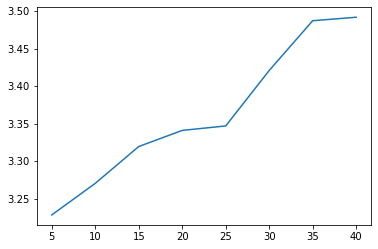

In [33]:
# Elite Athletes

y1 = elite["Pace (0-5K)"].mean()
y2 = elite["Pace (5-10K)"].mean()
y3 = elite["Pace (10-15K)"].mean()
y4 = elite["Pace (15-20K)"].mean()
y5 = elite["Pace (20-25K)"].mean()
y6 = elite["Pace (25-30K)"].mean()
y7 = elite["Pace (30-35K)"].mean()
y8 = elite["Pace (35-40K)"].mean()

y_elite = {5:y1,
     10:y2,
     15:y3,
     20:y4,
     25:y5,
     30:y6,
     35:y7,
     40:y8}

plt.plot(*zip(*sorted(y_elite.items())))
plt.show()

In [96]:
splits_elite_df = pd.DataFrame.from_dict(y_elite, orient='index', dtype=None, columns=None)
splits_elite_df.rename({0: 'Avg Pace (min/km)'}, axis=1, inplace=True)
splits_elite_df

,Avg Pace (min/km)
5,3.228696
10,3.270725
15,3.319710
20,3.341159
25,3.347101
30,3.420870
35,3.487101
40,3.491739


In [103]:
# Calculating the percent change from the 20-30k pace to 30-35k pace in elite marathoners to create a reference
pace_ref = (splits_elite_df["Avg Pace (min/km)"][25] + splits_elite_df["Avg Pace (min/km)"][25])/2
pace_bonk = splits_elite_df["Avg Pace (min/km)"][35]
percent_drop = (1- pace_ref/pace_bonk)*100
print(f'Percent Drop is {percent_drop:.1f}% in pace')

Percent Drop is 4.0% in pace


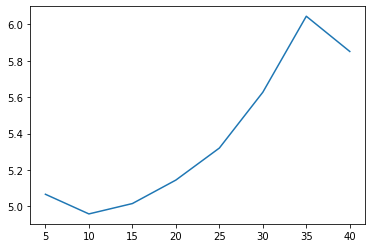

In [62]:
# Age Range: 20 year olds and under

y1 = ages_under_20["Pace (0-5K)"].mean()
y2 = ages_under_20["Pace (5-10K)"].mean()
y3 = ages_under_20["Pace (10-15K)"].mean()
y4 = ages_under_20["Pace (15-20K)"].mean()
y5 = ages_under_20["Pace (20-25K)"].mean()
y6 = ages_under_20["Pace (25-30K)"].mean()
y7 = ages_under_20["Pace (30-35K)"].mean()
y8 = ages_under_20["Pace (35-40K)"].mean()

y_under_20 = {5:y1,
     10:y2,
     15:y3,
     20:y4,
     25:y5,
     30:y6,
     35:y7,
     40:y8}

plt.plot(*zip(*sorted(y_under_20.items())))
plt.show()

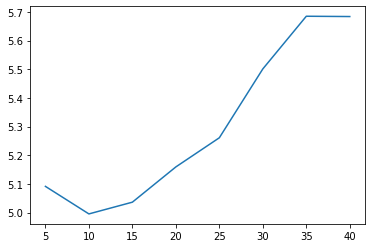

In [22]:
# Age Range: 20-25 year olds

y1 = ages_20_to_25["Pace (0-5K)"].mean()
y2 = ages_20_to_25["Pace (5-10K)"].mean()
y3 = ages_20_to_25["Pace (10-15K)"].mean()
y4 = ages_20_to_25["Pace (15-20K)"].mean()
y5 = ages_20_to_25["Pace (20-25K)"].mean()
y6 = ages_20_to_25["Pace (25-30K)"].mean()
y7 = ages_20_to_25["Pace (30-35K)"].mean()
y8 = ages_20_to_25["Pace (35-40K)"].mean()

y_20_25 = {5:y1,
     10:y2,
     15:y3,
     20:y4,
     25:y5,
     30:y6,
     35:y7,
     40:y8}

plt.plot(*zip(*sorted(y_20_25.items())))
plt.show()

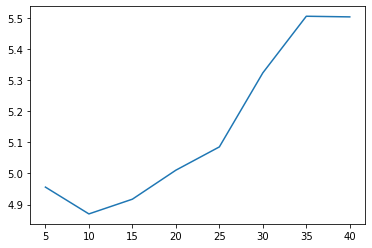

In [23]:
# Age Range: 25-30 year olds

y1 = ages_25_to_30["Pace (0-5K)"].mean()
y2 = ages_25_to_30["Pace (5-10K)"].mean()
y3 = ages_25_to_30["Pace (10-15K)"].mean()
y4 = ages_25_to_30["Pace (15-20K)"].mean()
y5 = ages_25_to_30["Pace (20-25K)"].mean()
y6 = ages_25_to_30["Pace (25-30K)"].mean()
y7 = ages_25_to_30["Pace (30-35K)"].mean()
y8 = ages_25_to_30["Pace (35-40K)"].mean()

y_25_30 = {5:y1,
     10:y2,
     15:y3,
     20:y4,
     25:y5,
     30:y6,
     35:y7,
     40:y8}

plt.plot(*zip(*sorted(y_25_30.items())))
plt.show()

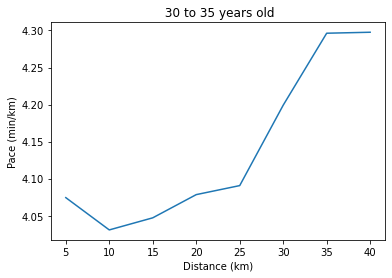

In [24]:
# Age Range: 30-35 year olds
Ages = " 30 to 35 years old"
y1 = ages_30_to_35["Pace (0-5K)"].mean()
y2 = ages_30_to_35["Pace (5-10K)"].mean()
y3 = ages_30_to_35["Pace (10-15K)"].mean()
y4 = ages_30_to_35["Pace (15-20K)"].mean()
y5 = ages_30_to_35["Pace (20-25K)"].mean()
y6 = ages_30_to_35["Pace (25-30K)"].mean()
y7 = ages_30_to_35["Pace (30-35K)"].mean()
y8 = ages_30_to_35["Pace (35-40K)"].mean()

y_30_35 = {5:y1,
     10:y2,
     15:y3,
     20:y4,
     25:y5,
     30:y6,
     35:y7,
     40:y8}

plt.plot(*zip(*sorted(y_30_35.items())))
plt.xlabel("Distance (km)")
plt.ylabel("Pace (min/km)")
plt.title(Ages)
plt.show()

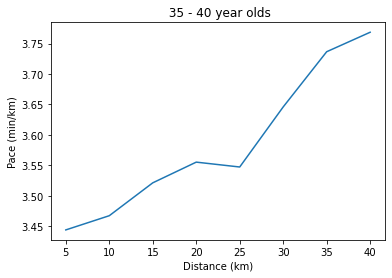

In [25]:
# Age Range: 35-40 year olds
Ages = " 35 - 40 year olds"
y1 = ages_35_to_40["Pace (0-5K)"].mean()
y2 = ages_35_to_40["Pace (5-10K)"].mean()
y3 = ages_35_to_40["Pace (10-15K)"].mean()
y4 = ages_35_to_40["Pace (15-20K)"].mean()
y5 = ages_35_to_40["Pace (20-25K)"].mean()
y6 = ages_35_to_40["Pace (25-30K)"].mean()
y7 = ages_35_to_40["Pace (30-35K)"].mean()
y8 = ages_35_to_40["Pace (35-40K)"].mean()

y_35_40 = {5:y1,
     10:y2,
     15:y3,
     20:y4,
     25:y5,
     30:y6,
     35:y7,
     40:y8}

plt.plot(*zip(*sorted(y_35_40.items())))
plt.xlabel("Distance (km)")
plt.ylabel("Pace (min/km)")
plt.title(Ages)
plt.show()

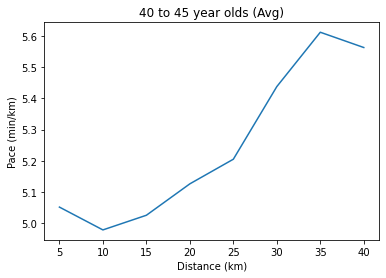

In [26]:
# Age Range: 40-45 year olds
Ages = "40 to 45 year olds (Avg)"

y1 = ages_40_to_45["Pace (0-5K)"].mean()
y2 = ages_40_to_45["Pace (5-10K)"].mean()
y3 = ages_40_to_45["Pace (10-15K)"].mean()
y4 = ages_40_to_45["Pace (15-20K)"].mean()
y5 = ages_40_to_45["Pace (20-25K)"].mean()
y6 = ages_40_to_45["Pace (25-30K)"].mean()
y7 = ages_40_to_45["Pace (30-35K)"].mean()
y8 = ages_40_to_45["Pace (35-40K)"].mean()

y_40_45 = {5:y1,
     10:y2,
     15:y3,
     20:y4,
     25:y5,
     30:y6,
     35:y7,
     40:y8}

plt.plot(*zip(*sorted(y_40_45.items())))
plt.xlabel("Distance (km)")
plt.ylabel("Pace (min/km)")
plt.title(Ages)
plt.show()

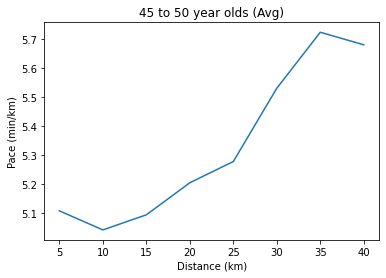

In [27]:
# Age Range: 45-50 year olds
Ages = "45 to 50 year olds (Avg)"
y1 = ages_45_to_50["Pace (0-5K)"].mean()
y2 = ages_45_to_50["Pace (5-10K)"].mean()
y3 = ages_45_to_50["Pace (10-15K)"].mean()
y4 = ages_45_to_50["Pace (15-20K)"].mean()
y5 = ages_45_to_50["Pace (20-25K)"].mean()
y6 = ages_45_to_50["Pace (25-30K)"].mean()
y7 = ages_45_to_50["Pace (30-35K)"].mean()
y8 = ages_45_to_50["Pace (35-40K)"].mean()

y_45_50 = {5:y1,
     10:y2,
     15:y3,
     20:y4,
     25:y5,
     30:y6,
     35:y7,
     40:y8}

plt.plot(*zip(*sorted(y_45_50.items())))
plt.xlabel("Distance (km)")
plt.ylabel("Pace (min/km)")
plt.title(Ages)
plt.show()

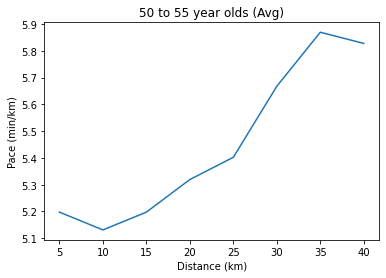

In [28]:
# Age Range: 50-55 year olds

Ages = "50 to 55 year olds (Avg)"
y1 = ages_50_to_55["Pace (0-5K)"].mean()
y2 = ages_50_to_55["Pace (5-10K)"].mean()
y3 = ages_50_to_55["Pace (10-15K)"].mean()
y4 = ages_50_to_55["Pace (15-20K)"].mean()
y5 = ages_50_to_55["Pace (20-25K)"].mean()
y6 = ages_50_to_55["Pace (25-30K)"].mean()
y7 = ages_50_to_55["Pace (30-35K)"].mean()
y8 = ages_50_to_55["Pace (35-40K)"].mean()

y_50_55 = {5:y1,
     10:y2,
     15:y3,
     20:y4,
     25:y5,
     30:y6,
     35:y7,
     40:y8}

plt.plot(*zip(*sorted(y_50_55.items())))

plt.xlabel("Distance (km)")
plt.ylabel("Pace (min/km)")
plt.title(Ages)
plt.show()

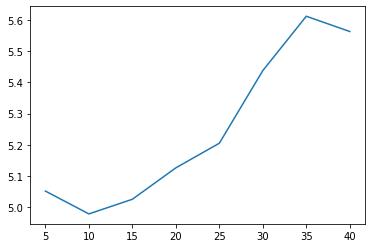

In [29]:
# Age Range: 40-45 year olds

y1 = ages_40_to_45["Pace (0-5K)"].mean()
y2 = ages_40_to_45["Pace (5-10K)"].mean()
y3 = ages_40_to_45["Pace (10-15K)"].mean()
y4 = ages_40_to_45["Pace (15-20K)"].mean()
y5 = ages_40_to_45["Pace (20-25K)"].mean()
y6 = ages_40_to_45["Pace (25-30K)"].mean()
y7 = ages_40_to_45["Pace (30-35K)"].mean()
y8 = ages_40_to_45["Pace (35-40K)"].mean()

y_40_45 = {5:y1,
     10:y2,
     15:y3,
     20:y4,
     25:y5,
     30:y6,
     35:y7,
     40:y8}

plt.plot(*zip(*sorted(y_40_45.items())))
plt.show()

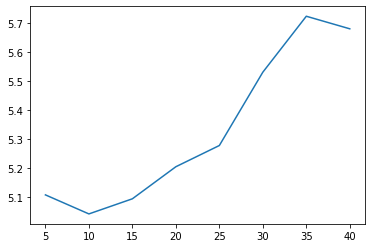

In [30]:
# Age Range: 45-50 year olds

y1 = ages_45_to_50["Pace (0-5K)"].mean()
y2 = ages_45_to_50["Pace (5-10K)"].mean()
y3 = ages_45_to_50["Pace (10-15K)"].mean()
y4 = ages_45_to_50["Pace (15-20K)"].mean()
y5 = ages_45_to_50["Pace (20-25K)"].mean()
y6 = ages_45_to_50["Pace (25-30K)"].mean()
y7 = ages_45_to_50["Pace (30-35K)"].mean()
y8 = ages_45_to_50["Pace (35-40K)"].mean()

y_45_50 = {5:y1,
     10:y2,
     15:y3,
     20:y4,
     25:y5,
     30:y6,
     35:y7,
     40:y8}

plt.plot(*zip(*sorted(y_45_50.items())))
plt.show()

In [40]:
paces.to_csv("paces.csv")

In [ ]:
plt.plot(*zip(*sorted(y.items())))
plt.show()